# Análisis de Radiosondeos

Este es el código que se utilizará para desarrollar el análisis de un sondeo aerológico. Para ello el estudiante solo tendrá que modificar las sentencias que se encuentran entre:

#------------------------------------------------------------------------------------------------------------------------------

         Modifique SOLO aquí dentro

#------------------------------------------------------------------------------------------------------------------------------

**Importante**:
- Un error recurrente puede ser que las rutas se especifiquen con '\\' como separador entre carpetas, mientras que el lenguaje Python utiliza '\\\\' (doble). 
- También se recomienda correr una a una las celdas, y no correr de nuevo una celda mientras se está ejecutando (el software puede quedarse colgado). Si mientras una celda se está ejecutando, se realiza algún cambio en el código de esa celda y queremos volver a ejecutarla, deberemos esperar a que termine o reiniciar los kernels.
- Si lo desea, puede jugar con el resto del código.

**IMPORTACIÓN DE LIBRERÍAS Y ESPECIFICACIÓN DE RUTAS**

En primer lugar **instalamos las librerías** necesarias.
 **Solo es necesario ejecutar estas celdas una vez**

In [88]:
# NumPy, Pandas, and Matplotlib
%pip install numpy pandas matplotlib 

# Creo que las instalan directamente SounderPy y MetPy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [89]:
# SounderPy
%pip install sounderpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [90]:
# MetPy
%pip install metpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### **Importamos las librerías** necesarias.
Ejecutar cada vez que queramos utilizar el código.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Importing SounderPy
import sounderpy as spy

# Importing MetPy utils
import metpy.calc as mpcalc
from metpy.plots import SkewT
from metpy.units import units
from metpy.constants import Cp_d, Rd, Lv, epsilon, gamma_d
from metpy.calc import lcl, parcel_profile, lfc

from metpy.cbook import get_test_data

# Importar las funciones de interpolación
from funciones import *

También, antes de comenzar con el tratamiento de los ficheros, definimos la ruta en la que se encuentran los datos y en la que queremos guardar las gráficas de resultados.

In [92]:
#------------------------------------------------------------------------------------------------------------------------------
# CUIDADO con utilizar \ en Python!

cwd = os.getcwd()  # Current working directory
# databasepath = 'C:\\Practica_Sondeos\\'  #Database folder path.
outputpath = f'{cwd}/output'  # Output folder path.
# outputpath = os.getcwd()  # Output folder path, current working directory.
#------------------------------------------------------------------------------------------------------------------------------

-----
-----

# **Descargar datos observacionales**

* **Paso 1:** Determinar los parámetros necesarios para indicar la información que queremos.
Por ejemplo el ID de la estación y la fecha del sondeo
* **Paso 2:** Guardar la información en una variable

----

**Antes de empezar**, investiguemos los datos que SounderPy puede obtener:

* **Datos RAOB**: Observaciones de RadiosondAs de sitios de lanzamiento del NWS
* **IGRAv2**: Archivo Global Integrado de Radiosondeos (básicamente los mismos datos, pero incluye algunos datos antiguos)

Algunos recordatorios sobre los datos observados:

* Los datos observados están disponibles *generalmente* a las 12 y 00 UTC, algunos lanzamientos especiales (18, 21, 03 UTC etc) también están disponibles para fechas específicas.

* Estos datos son observados, como tal, algunos datos pueden ser erróneos, incompletos o estar faltantes.

-----

**Para obtener datos observados de SounderPy**, utilizaremos esta línea de código:

``obs_data = spy.get_obs_data(site_id, year, month, day, hour)``

*   ``obs_data`` es el nombre en el que almacenamos los datos (¡esto puede ser lo que quieras!)
*   ``spy`` está llamando al software SounderPy diciendo "oye, me gustaría acceder a una de las herramientas de SounderPy"
*   ``get_obs_data()`` le está diciendo a SounderPy qué herramienta queremos usar
*   ``site_id``, ``year``, ``month``, ``day``, y ``hour`` son todos parámetros que la herramienta ``get_obs_data`` necesita para obtener los datos.


**Lista de ID** 

| **Estación**                | WMO    | ICAO  | IGRA         | EL (m) | LAT      | LON      |
|-----------------------------|--------|-------|--------------|--------|----------|----------|
| **GRANADA**                 | 08419  | ----  | ----         | 570    | 37.19 N  | 3.79 W   |
| **MADRID/BARAJAS**          | 08221  | LEMD  | SPM00008221  | 582    | 40.45 N  | 3.55 W   |
| **LA CORUNA/ALVED**         | 08002  | LECO  | SPM00008001  | 103    | 43.30 N  | 8.38 W   |
| **SAN SEBASTIAN**           | 08029  | LESO  | ----         | 8      | 43.35 N  | 1.80 W   |
| **VALLADOLID (MIL/CIV)**    | 08140  | LEVD  | SPM00008140  | 854    | 41.72 N  | 4.85 W   |
| **ZARAGOZA (MIL/CIV)**      | 08160  | LEZG  | SPM00008160  | 258    | 41.67 N  | 1.02 W   |
| **BARCELONA**               | 08190  | LBCN  | SPM00008190  | 98     | 41.62 N  | 2.20 E   |
| **PALMA DE MALLORCA**       | 08301  | ----  | SPM00008301  | 6      | 39.55 N  | 2.62 E   |
| **PALMA/SON BONET**         | 08302  | ----  | SPM00008302  | 41     | 39.60 N  | 2.70 E   |
| **HUELVA**                  | 08383  | ----  | SPM00008383  | 20     | 37.28 N  | 6.91 W   |
| **MURCIA**                  | 08430  | ----  | SPM00008430  | 62     | 38.00 N  | 1.17 W   |
| **CASTILLO GALERA**         | 08431  | ----  | ----         | 217    | 37.58 N  | 1.00 W   |
| **ROTA NAS**                | 08449  | LERT  | ----         | 27     | 36.65 N  | 6.35 W   |
| **MENORCA/MAHON**           | 08314  | LEMH  | SPM00008314  | 86     | 39.87 N  | 4.23 E   | *
| **SANTANDER**               | 08023  | ----  | SPM00008023  | 52     | 43.49 N  | 3.80 W   |
| **LEON/VIRGEN DEL CAM**     | 08055  | ----  | SPM00008055  | 914    | 42.58 N  | 5.65 W   |
| **LOGRONO/AGONCILLO**       | 08084  | ----  | SPM00008084  | 363    | 42.45 N  | 2.33 W   |
| **BARDENAS REALES**         | 08087  | ----  | SPM00008087  | 295    | 42.20 N  | 1.45 W   |
| **SALAMANCA/MATACAN**       | 08202  | ----  | SPM00008202  | 794    | 40.95 N  | 5.50 W   |
| **MURCIA/SAN JAVIER**       | 08433  | ----  | SPM00008433  | 3      | 37.78 N  | 0.80 W   |
| **STA. CRUZ DE TENERIFE**   | 60020  | ----  | SPM00060020  | 36     | 28.47 N  | 16.25 W  |
| **TENERIFE-GUIMAR**         | 60018  | ----  | SPM00060018  | 105    | 28.32 N  | 16.38 W  |

In [93]:
#------------------------------------------------------------------------------------------------------------------------------
# Determinar los parámetros

site_id = 'SPM00008221' # ID de la estación (ej: 'SPM00008221' para la estación de Madrid/Barajas)
year  = '2022'
month = '05'
day   = '20'
hour  = '12' # Hora en UTC (ej: '12' para mediodía) 

save_csv = True  # Guardar los datos en un archivo CSV

#------------------------------------------------------------------------------------------------------------------------------

# PASO 2 - Cargar los datos y almacenarlos en una variable
# Añadimos nuestros parámetros definidos arriba en la herramienta de abajo
# obs_data = spy.get_obs_data(site_id, year, month, day, hour) 
# hush=True evita imprimir los datos termodinámicos en la consola

obs_data = spy.get_obs_data(site_id, year, month, day, hour, hush=True)

# PASO 3 - Guardar en un archivo CSV
if save_csv:
    csv_filename = f'{outputpath}/{site_id}_{year}{month}{day}_{hour}00.csv'
    
    # Crear el directorio si no existe
    os.makedirs(outputpath, exist_ok=True)
    
    # Crear DataFrame desde el diccionario de obs_data
    # Extraer solo los datos numéricos y convertir las cantidades Pint a valores numéricos
    data_dict = {
        'p': obs_data['p'].magnitude,
        'z': obs_data['z'].magnitude,
        'T': obs_data['T'].magnitude,
        'Td': obs_data['Td'].magnitude,
        'u': obs_data['u'].magnitude,
        'v': obs_data['v'].magnitude
    }
    df_obs_data = pd.DataFrame(data_dict)
    
    # Ordenar por altura (z) de menor a mayor
    df_obs_data = df_obs_data.sort_values('z', ascending=True)
    
    # Establecer la altura como índice
    df_obs_data.set_index('z', inplace=True)
    
    # Guardar el archivo CSV
    df_obs_data.to_csv(csv_filename)
    print(f'\nDatos guardados en {csv_filename}')
    print(f'Datos organizados por altura: {df_obs_data.index.min():.0f} - {df_obs_data.index.max():.0f} m')
    print(f'Columnas disponibles: {list(df_obs_data.columns)}')

> OBSERVED DATA ACCESS FUNCTION
  -----------------------------------
    > PROFILE FOUND: SPM00008221 on 05/20/2022 at 12z | From IGRAv2
    > PROFILE FOUND: SPM00008221 on 05/20/2022 at 12z | From IGRAv2
    > COMPLETE --------
    > RUNTIME: 00:01:17

Datos guardados en /mnt/c/conexion_lpp/practicas/output/SPM00008221_20220520_1200.csv
Datos organizados por altura: 862 - 26610 m
Columnas disponibles: ['p', 'T', 'Td', 'u', 'v']
    > COMPLETE --------
    > RUNTIME: 00:01:17

Datos guardados en /mnt/c/conexion_lpp/practicas/output/SPM00008221_20220520_1200.csv
Datos organizados por altura: 862 - 26610 m
Columnas disponibles: ['p', 'T', 'Td', 'u', 'v']


## Resolución vertical

In [94]:
#------------------------------------------------------------------------------------------------------------------------------
# Parámetros de interpolación - MODIFIQUE AQUÍ

dz = 10  # Resolución vertical en metros (ej: 10, 25, 50)
dp = 20  # Resolución en presión en hPa (ej: 1, 5, 10, 20, 50)

# Elegir el método de interpolación (True o False)

int_presion = True  # Interpolar por presión
int_altura = False   # Interpolar por altura

#------------------------------------------------------------------------------------------------------------------------------

# Crear DataFrame con los datos originales
df_cut = pd.DataFrame({
        'z': obs_data['z'].magnitude, 
        'T': obs_data['T'].magnitude, 
        'p': obs_data['p'].magnitude,
        'Td': obs_data['Td'].magnitude
    })


# Aplicar interpolación según los parámetros seleccionados
if int_presion:
    print(f"Interpolando por presión con resolución de {dp} hPa...")
    obs_data_dp = interpolar_radiosondeo(df_cut, metodo='presion', resolucion=dp)
    print(f"Datos interpolados por presión: {len(obs_data_dp)} puntos")

if int_altura:
    print(f"Interpolando por altura con resolución de {dz} m...")
    obs_data_dz = interpolar_radiosondeo(df_cut, metodo='altura', resolucion=dz)
    print(f"Datos interpolados por altura: {len(obs_data_dz)} puntos")

# Mostrar estadísticas de los datos
print(f"\nDatos originales: {len(df_cut)} puntos")
if int_presion or int_altura:
    print(f"Rango de alturas: {df_cut['z'].min():.0f} - {df_cut['z'].max():.0f} m")
    print(f"Rango de presiones: {df_cut['p'].min():.0f} - {df_cut['p'].max():.0f} hPa")

Interpolando por presión con resolución de 20 hPa...
Datos interpolados por presión: 48 puntos

Datos originales: 15 puntos
Rango de alturas: 862 - 26610 m
Rango de presiones: 20 - 950 hPa
Datos interpolados por presión: 48 puntos

Datos originales: 15 puntos
Rango de alturas: 862 - 26610 m
Rango de presiones: 20 - 950 hPa


-----
-----

# **Representar el radiosondeo con SounderPy**

In [95]:
# PASO 1 - Simplemente añadir nuestra variable `obs_data` a la herramienta de gráficos de SounderPy
# también podemos declarar algunas configuraciones y añadirlas a la herramienta.

style       = 'full'  # 'simple' o 'full'
dark_mode  = False     # prueba cambiando a.... True
color_blind   = False     # prueba cambiando a.... True

# Descomentar esta línea para generar el gráfico:
# spy.build_sounding(obs_data, style, color_blind, dark_mode)

 # **Analizar radiosondeo utilizando MetPy** 

In [96]:
#------------------------------------------------------------------------------------------------------------------------------
# Determinar si queremos representar el punto de rocío
get_Td = True

#------------------------------------------------------------------------------------------------------------------------------
# Seleccionar los datos interpolados apropiados basándose en la elección anterior
if int_presion:
    repr_data = obs_data_dp
elif int_altura:
    repr_data = obs_data_dz
else:
    repr_data = df_cut  # Usar datos originales si no se eligió interpolación

P = repr_data['p'] 
T = repr_data['T'] 

# Opcional si la tiene
if get_Td:
    Td = repr_data['Td'] # units.degC

# Para ver las variables y sus valores
# print(obs_data.keys())
# print(P)
# print(T)

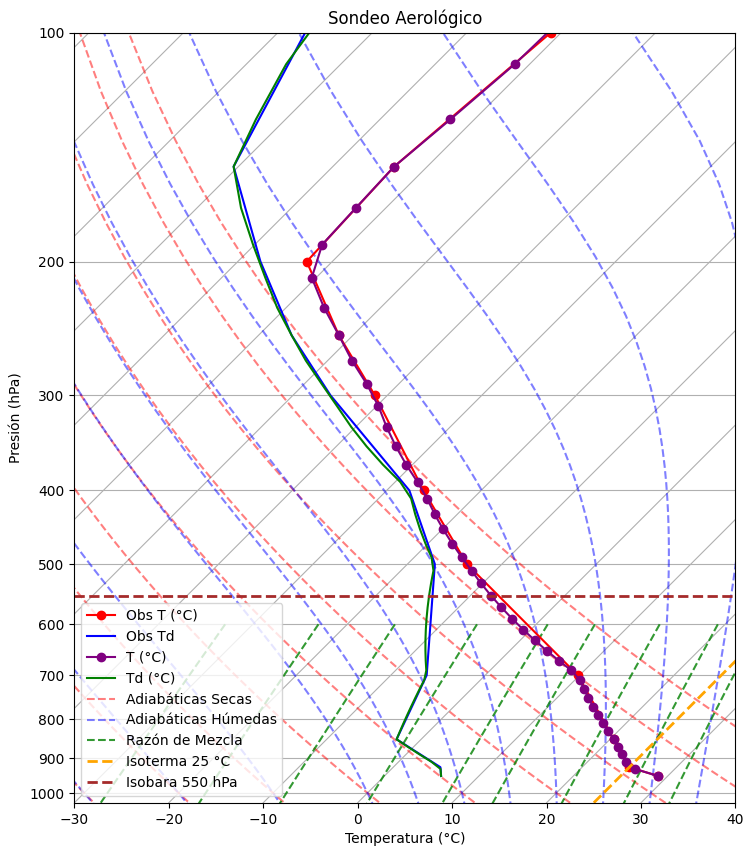

In [97]:
#------------------------------------------------------------------------------------------------------------------------------
# Determinar el zoom
p_min, p_max = 1030, 100  # Presión mínima y máxima en hPa
T_min, T_max = -30, 40  # Temperatura mínima y máxima en °C

# Dibujar Isobaras y Isotermas
draw_isoterm = True  # Dibujar isotermas
T_iso = 25 # Temperatura isoterma en °C (ej: 40, 30, 20, 10, 0, -10, -20, -30)

draw_isobar = True  # Dibujar isobaras
P_iso = 550  # Presión isobara en hPa (ej: 1000, 900, 800, 700, 600, 500, 400, 300, 200, 100)

# Guardar la imagen
save_img = False

#------------------------------------------------------------------------------------------------------------------------------

# Crear una figura y un eje
fig_diagrama_vacio = plt.figure(figsize=(10, 10))

# Crear un gráfico Skew-T sobre la figura existente
skew = SkewT(fig=fig_diagrama_vacio, rotation=45)

# Graficar la temperatura y el punto de rocío
# skew.plot(obs_data['p'], obs_data['T'], 'purple', marker='o', label='T (°C)')
# skew.plot(obs_data['p'], obs_data['Td'], 'g', label='Td (°C)')

skew.plot(obs_data['p'], obs_data['T'], 'red', marker='o', label='Obs T (°C)')
skew.plot(obs_data['p'], obs_data['Td'], 'blue', label='Obs Td')
skew.plot(P, T, 'purple', marker='o', label='T (°C)')
skew.plot(P, Td, 'g', label='Td (°C)')

# Añadir líneas de temperatura seca y húmeda
skew.plot_dry_adiabats(label='Adiabáticas Secas')
skew.plot_moist_adiabats(label='Adiabáticas Húmedas')
skew.plot_mixing_lines(label='Razón de Mezcla')

# Isoterma
if draw_isoterm:
    skew.ax.axvline(T_iso, color='orange', linestyle='--', linewidth=2, label=f'Isoterma {T_iso} °C')
# Isobara
if draw_isobar:
    skew.ax.axhline(P_iso, color='brown', linestyle='--', linewidth=2, label=f'Isobara {P_iso} hPa')


# Configurar el gráfico
plt.title('Sondeo Aerológico')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Presión (hPa)')
plt.grid(True)

# Ajustar los límites de los ejes para hacer zoom
plt.xlim(T_min, T_max)  # Ajusta los valores según tus necesidades
plt.ylim(p_min, p_max)  # Ajusta los valores según tus necesidades

plt.legend()

if save_img:
    # Crear el directorio si no existe
    os.makedirs(outputpath, exist_ok=True)
    plt.savefig(f'{outputpath}/sondeo.png', format='png', dpi=300)

plt.show()

# Variables de interés

In [98]:
#------------------------------------------------------------------------------------------------------------------------------
# Parámetros para cálculos - MODIFIQUE AQUÍ
usar_interpolado = True  # True para usar datos interpolados, False para datos originales

save_img = True  # Guardar la imagen del sondeo

#------------------------------------------------------------------------------------------------------------------------------

### NCE

La temperatura potencial es: 300.32 kelvin
El NCE es: 677.73 hectopascal


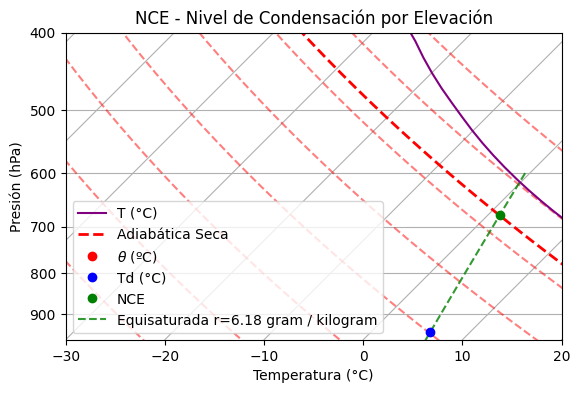

In [99]:
# Seleccionar datos según parámetro
if usar_interpolado and int_presion:
    data_calc = obs_data_dp
    P_calc = data_calc['p'].values * units.hPa
    T_calc = data_calc['T'].values * units.degC
    Td_calc = data_calc['Td'].values * units.degC
elif usar_interpolado and int_altura:
    data_calc = obs_data_dz
    P_calc = data_calc['p'].values * units.hPa
    T_calc = data_calc['T'].values * units.degC
    Td_calc = data_calc['Td'].values * units.degC
else:
    P_calc = obs_data['p'] * units.hPa
    T_calc = obs_data['T'] * units.degC
    Td_calc = obs_data['Td'] * units.degC

# Crear un gráfico Skew-T
skew = SkewT(rotation=45)

# Graficar la temperatura y el punto de rocío
skew.plot(P_calc, T_calc, 'purple', label='T (°C)')

# Calcular la temperatura a lo largo de las adiabáticas secas
T_adiabat = mpcalc.dry_lapse(P_calc, T_calc[0], P_calc[0])
# Temperatura potencial
theta = T_adiabat[1]

# Dibujar las adiabáticas secas
skew.plot(P_calc, T_adiabat, color='red', linestyle='--', linewidth=2, label='Adiabática Seca')
skew.plot(P_calc[1], theta, 'ro', label=r'$\theta$ (ºC)')
skew.plot_dry_adiabats()

print(f'La temperatura potencial es: {theta:.2f}')

# Calcular el NCE para el nivel inicial
lcl_pressure, lcl_temperature = mpcalc.lcl(P_calc[0], T_calc[0], Td_calc[0])
print(f'El NCE es: {lcl_pressure:.2f}')

skew.plot(P_calc[0], Td_calc[0], 'bo', label='Td (°C)')
skew.plot(lcl_pressure, lcl_temperature, 'go', label='NCE')

# Calcular la razón de mezcla
r = mpcalc.mixing_ratio_from_relative_humidity(P_calc[0], T_calc[0], 
    mpcalc.relative_humidity_from_dewpoint(T_calc[0], Td_calc[0])).to('g/kg')
skew.plot_mixing_lines(mixing_ratio=r, linestyle='--', color='green', 
                      label=f'Equisaturada r={r:.2f}')

# Configurar el gráfico
plt.title('NCE - Nivel de Condensación por Elevación')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Presión (hPa)')
plt.grid(True)

# Ajustar los límites de los ejes
plt.xlim(-30, 20)
plt.ylim(P_calc[0].magnitude + 20, 400)

plt.legend(loc='lower left')

if save_img:
    # Crear el directorio si no existe
    os.makedirs(outputpath, exist_ok=True)
    plt.savefig(f'{outputpath}/NCE.png', format='png', dpi=300)
plt.show()

## Cálculos termodinámicos

In [100]:
T_0 = T_calc[0]
P_0 = P_calc[0]
r = mpcalc.mixing_ratio_from_relative_humidity(P_calc[0], T_calc[0], 
    mpcalc.relative_humidity_from_dewpoint(T_calc[0], Td_calc[0])).to('g/kg')

print('Situación inicial')
print('='*50)

# Tensión de vapor
print('e - Tensión de vapor')
e = (r * P_0) / (epsilon + r)
e = e.to('hPa')

e_metpy = mpcalc.vapor_pressure(P_0, r)

print(f'Tensión de vapor: {e:.2f}')
print(f'Tensión de vapor MetPy: {e_metpy:.2f}')

print('='*50)

# Humedad relativa
print('U - Humedad relativa')
U = 100 * (e / mpcalc.saturation_vapor_pressure(T_0).to('hPa'))

U_metpy = mpcalc.relative_humidity_from_mixing_ratio(P_calc[0], T_calc[0], r).to('percent')
relhum = mpcalc.relative_humidity_from_dewpoint(T_calc[0], Td_calc[0]).to('percent')

print(f'Humedad relativa: {U:.2f}%')
print(f'Humedad relativa MetPy: {U_metpy:.2f} y {relhum:.2f}')

print('='*50)

# Temperatura potencial (Theta)
print('theta - Temperatura potencial')

theta_calc = T_0 * (1000 * units.hPa / P_0)**(0.286)
theta_calc = theta_calc.to('degC')
theta_metpy = mpcalc.potential_temperature(P_0, T_0).to('degC')

print(f'Temperatura potencial: {theta_calc:.2f}')
print(f'Temperatura potencial MetPy: {theta_metpy:.2f}')

print('='*50)

Situación inicial
e - Tensión de vapor
Tensión de vapor: 9.35 hectopascal
Tensión de vapor MetPy: 9.35 hectopascal
U - Humedad relativa
Humedad relativa: 23.33 dimensionless%
Humedad relativa MetPy: 23.33 percent y 23.33 percent
theta - Temperatura potencial
Temperatura potencial: 33.47 degree_Celsius
Temperatura potencial MetPy: 33.46 degree_Celsius


## Termómetro húmedo

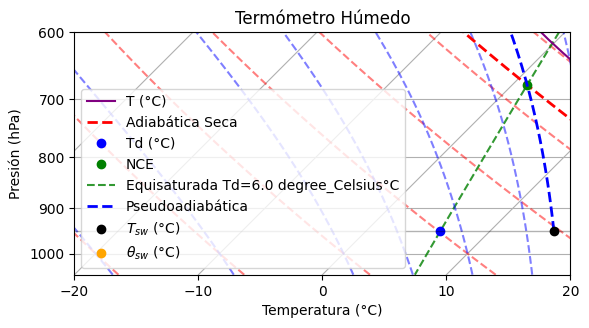

In [101]:
# Crear un gráfico Skew-T
skew = SkewT(rotation=45)

# Graficar la temperatura y el punto de rocío
skew.plot(P_calc, T_calc, 'purple', label='T (°C)')

# Calcular la temperatura a lo largo de las adiabáticas secas
T_adiabat = mpcalc.dry_lapse(P_calc, T_calc[0], P_calc[0])

# Dibujar las adiabáticas secas
skew.plot(P_calc, T_adiabat, color='red', linestyle='--', linewidth=2, label='Adiabática Seca')
skew.plot_dry_adiabats()

# Calcular el NCE
lcl_pressure, lcl_temperature = mpcalc.lcl(P_calc[0], T_calc[0], Td_calc[0])

skew.plot(P_calc[0], Td_calc[0], 'bo', label='Td (°C)')
skew.plot(lcl_pressure, lcl_temperature, 'go', label='NCE')

# Calcular la razón de mezcla
r = mpcalc.mixing_ratio_from_relative_humidity(P_calc[0], T_calc[0], 
    mpcalc.relative_humidity_from_dewpoint(T_calc[0], Td_calc[0])).to('g/kg')
skew.plot_mixing_lines(mixing_ratio=r, linestyle='--', color='green', 
                      label=f'Equisaturada Td={Td_calc[0]:.1f}°C')

# Calcular la Pseudo-adiabática (adiabática saturada)
T_pseudo = mpcalc.moist_lapse(P_calc, lcl_temperature, lcl_pressure)

# Dibujar las adiabáticas húmedas
skew.plot(P_calc, T_pseudo, color='blue', linestyle='--', linewidth=2, label='Pseudoadiabática')
skew.plot_moist_adiabats()

# Dibujamos los puntos:
T_sw = mpcalc.wet_bulb_temperature(P_calc[0], T_calc[0], Td_calc[0])
q_sw = mpcalc.wet_bulb_potential_temperature(P_calc[0], T_calc[0], Td_calc[0]).to('degC')

skew.plot(P_calc[0], T_sw, 'o', color='black', label=r'$T_{sw}$ (°C)')
skew.plot(P_calc[1], q_sw, 'o', color='orange', label=r'$\theta_{sw}$ (°C)')

# Isobar
skew.ax.axhline(P_calc[0], color='black', alpha=0.3, linestyle='-', linewidth=1)

# Configurar el gráfico
plt.title('Termómetro Húmedo')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Presión (hPa)')
plt.grid(True)

# Ajustar los límites de los ejes
plt.xlim(-20, 20)
plt.ylim(P_calc[0].magnitude + 100, 600)

plt.legend(loc='lower left')

if save_img:
    # Crear el directorio si no existe
    os.makedirs(outputpath, exist_ok=True)
    plt.savefig(f'{outputpath}/SW_SE.png', format='png', dpi=300)
plt.show()

## T pseudoequivalente

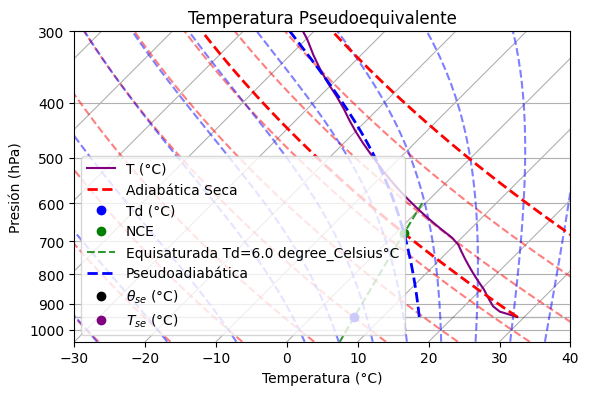

In [102]:
# Crear un gráfico Skew-T
skew = SkewT(rotation=45)

# Graficar la temperatura y el punto de rocío
skew.plot(P_calc, T_calc, 'purple', label='T (°C)')

# Calcular la temperatura a lo largo de las adiabáticas secas
T_adiabat = mpcalc.dry_lapse(P_calc, T_calc[0], P_calc[0])

# Dibujar las adiabáticas secas
skew.plot(P_calc, T_adiabat, color='red', linestyle='--', linewidth=2, label='Adiabática Seca')
skew.plot_dry_adiabats()

# Calcular el NCE
lcl_pressure, lcl_temperature = mpcalc.lcl(P_calc[0], T_calc[0], Td_calc[0])

skew.plot(P_calc[0], Td_calc[0], 'o', color='blue', label='Td (°C)')
skew.plot(lcl_pressure, lcl_temperature, 'o', color='green', label='NCE')

# Calcular la razón de mezcla
r = mpcalc.mixing_ratio_from_relative_humidity(P_calc[0], T_calc[0], 
    mpcalc.relative_humidity_from_dewpoint(T_calc[0], Td_calc[0])).to('g/kg')
skew.plot_mixing_lines(mixing_ratio=r, linestyle='--', color='green', 
                      label=f'Equisaturada Td={Td_calc[0]:.1f}°C')

# Calcular la Pseudo-adiabática (adiabática saturada)
T_pseudo = mpcalc.moist_lapse(P_calc, lcl_temperature, lcl_pressure)

# Dibujar las adiabáticas húmedas
skew.plot(P_calc, T_pseudo, color='blue', linestyle='--', linewidth=2, label='Pseudoadiabática')
skew.plot_moist_adiabats()

# Isobar
skew.ax.axhline(P_calc[0], color='black', alpha=0.3, linestyle='-', linewidth=1)

# Calcular la temperatura pseudopotencial equivalente
q_se = mpcalc.equivalent_potential_temperature(P_calc[0], T_calc[0], Td_calc[0])
T_adiabat_se = mpcalc.dry_lapse(P_calc, q_se, P_calc[1])

T_se = T_adiabat_se[0]

# Dibujar la adiabática seca que pasa por q_se
skew.plot(P_calc, T_adiabat_se, color='red', linestyle='--', linewidth=2)
skew.plot(P_calc[1], q_se, 'o', color='black', label=r'$\theta_{se}$ (°C)')
skew.plot(P_calc[0], T_se, 'o', color='purple', label=r'$T_{se}$ (°C)')

# Configurar el gráfico
plt.title('Temperatura Pseudoequivalente')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Presión (hPa)')
plt.grid(True)

# Ajustar los límites de los ejes
plt.xlim(-30, 40)
plt.ylim(P_calc[0].magnitude + 100, 300)

plt.legend(loc='lower left')

if save_img:
    # Crear el directorio si no existe
    os.makedirs(outputpath, exist_ok=True)
    plt.savefig(f'{outputpath}/theta_se.png', format='png', dpi=300)
plt.show()

### Cálculos detallados

In [103]:
# Termómetro húmedo
print('Termómetro húmedo - q_sw y T_sw')
q_sw = mpcalc.wet_bulb_potential_temperature(P_0, T_0, Td_calc[0]).to('degC')
T_sw = mpcalc.wet_bulb_temperature(P_0, T_0, Td_calc[0]).to('degC')
print(f'Pseudotemperatura potencial del termómetro húmedo: {q_sw:.2f}')
print(f'Pseudotemperatura del termómetro húmedo: {T_sw:.2f}')

print('='*50)
 
# Temperatura pseudopotencial equivalente
print('Temperatura pseudopotencial equivalente - q_se y T_se')
q_se = mpcalc.equivalent_potential_temperature(P_0, T_0, Td_calc[0]).to('degC')
T_se = mpcalc.dry_lapse(P_calc, q_se, P_calc[1])[0].to('degC')
print(f'Temperatura pseudopotencial equivalente: {q_se:.2f}')
print(f'Temperatura pseudoequivalente: {T_se:.2f}')

# Temperatura equivalente 
print('\nTemperatura equivalente - T_e')
T_e = T_0.to('K') + (r * Lv) / Cp_d
T_e = T_e.to('degC')

q_e = T_e * (1000 * units.hPa / P_0)**(0.286)

print(f'Temperatura equivalente: {T_e:.2f}')
print(f'Temperatura potencial equivalente: {q_e:.2f}')

print('='*50)

Termómetro húmedo - q_sw y T_sw
Pseudotemperatura potencial del termómetro húmedo: 17.28 degree_Celsius
Pseudotemperatura del termómetro húmedo: 15.17 degree_Celsius
Temperatura pseudopotencial equivalente - q_se y T_se
Temperatura pseudopotencial equivalente: 52.60 degree_Celsius
Temperatura pseudoequivalente: 54.59 degree_Celsius

Temperatura equivalente - T_e
Temperatura equivalente: 44.39 degree_Celsius
Temperatura potencial equivalente: 322.23 kelvin


## NCL y NCC

NCL encontrado en: 514.0 hectopascal hPa, -12.0 degree_Celsius°C
NCC encontrado en: 361.2 hectopascal hPa, -32.0 degree_Celsius°C
La temperatura de convección es: 317.92 kelvin
CAPE: 47.2 joule / kilogram J/kg
CIN: -376.1 joule / kilogram J/kg


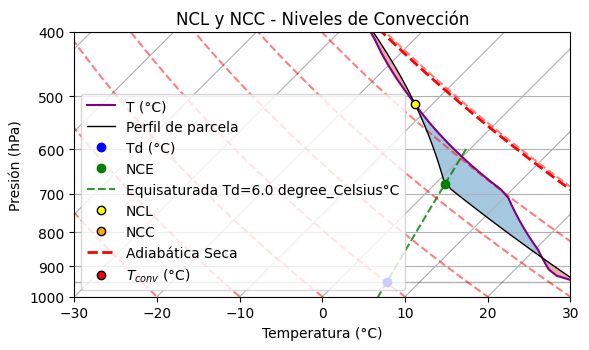

In [104]:
# Crear un gráfico Skew-T
skew = SkewT(rotation=45)

# Graficar la temperatura y el punto de rocío
skew.plot(P_calc, T_calc, 'purple', label='T (°C)')

# Calculate full parcel profile and add to plot as black line
profile = mpcalc.parcel_profile(P_calc, T_calc[0], Td_calc[0]).to('degC')
skew.plot(P_calc, profile, 'k', linewidth=1, label='Perfil de parcela')

# Areas de CAPE y CIN
cape, cin = mpcalc.cape_cin(P_calc, T_calc, Td_calc, profile)
skew.shade_cin(P_calc, T_calc, profile)       # Azul
skew.shade_cape(P_calc, T_calc, profile)      # Rojo

# Calcular el NCE
lcl_pressure, lcl_temperature = mpcalc.lcl(P_calc[0], T_calc[0], Td_calc[0])

# Punto de rocío y NCE
skew.plot(P_calc[0], Td_calc[0], 'bo', label='Td (°C)')
skew.plot(lcl_pressure, lcl_temperature, 'go', label='NCE')

# Calcular la razón de mezcla
r = mpcalc.mixing_ratio_from_relative_humidity(P_calc[0], T_calc[0], 
    mpcalc.relative_humidity_from_dewpoint(T_calc[0], Td_calc[0])).to('g/kg')
skew.plot_mixing_lines(mixing_ratio=r, linestyle='--', color='green', 
                      label=f'Equisaturada Td={Td_calc[0]:.1f}°C')

# Calcular el NCL (LFC) y NCC (EL) - se obtienen del perfil de parcela
try:
    lfc_pressure, lfc_temperature = mpcalc.lfc(P_calc, T_calc, Td_calc)
    skew.plot(lfc_pressure, lfc_temperature, 'ko', markerfacecolor='yellow', label='NCL')
    print(f'NCL encontrado en: {lfc_pressure:.1f} hPa, {lfc_temperature:.1f}°C')
except:
    print('NCL no encontrado en los datos')

try:
    el_pressure, el_temperature = mpcalc.el(P_calc, T_calc, Td_calc)
    skew.plot(el_pressure, el_temperature, 'ko', markerfacecolor='orange', label='NCC')
    print(f'NCC encontrado en: {el_pressure:.1f} hPa, {el_temperature:.1f}°C')
    
    # Adiabática seca que pasa por NCC
    T_adiabat_NCC = mpcalc.dry_lapse(P_calc, el_temperature, el_pressure)
    T_conv = T_adiabat_NCC[0]
    print(f'La temperatura de convección es: {T_conv:.2f}')
    
    # Dibujar la adiabática seca
    skew.plot(P_calc, T_adiabat_NCC, color='red', linestyle='--', linewidth=2, label='Adiabática Seca')
    skew.plot(P_0, T_conv, 'ko', markerfacecolor='red', label=r'$T_{conv}$ (°C)')
except:
    print('NCC no encontrado en los datos')

skew.plot_dry_adiabats()

# Isobar
skew.ax.axhline(P_calc[0], color='black', alpha=0.3, linestyle='-', linewidth=1)

# Mostrar valores de CAPE y CIN
print(f'CAPE: {cape:.1f} J/kg')
print(f'CIN: {cin:.1f} J/kg')

# Configurar el gráfico
plt.title('NCL y NCC - Niveles de Convección')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Presión (hPa)')
plt.grid(True)

# Ajustar los límites de los ejes
plt.xlim(-30, 30)
plt.ylim(P_calc[0].magnitude + 50, 400)

plt.legend(loc='lower left')

if save_img:
    # Crear el directorio si no existe
    os.makedirs(outputpath, exist_ok=True)
    plt.savefig(f'{outputpath}/NCL_NCC.png', format='png', dpi=300)
plt.show()